In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_json('../dataset/cleaned_funds.json')

In [5]:
df.head()

,Scheme,Name,Fund Type,Launch Date,Fund Size (HKD m),Risk Class,Latest FER (%),Annualized Return: 1 Year (% p.a.),Annualized Return: 5 Year (% p.a.),Since Launch
0,AIA MPF - Prime Value Choice,Age 65 Plus Fund,Mixed Assets Fund - Default Investment Strateg...,2017-04-01T00:00:00,1508.33,4.0,0.80,1.08,-3.38,1.934604
1,AIA MPF - Prime Value Choice,American Fund,Equity Fund - United States Equity Fund,2011-09-23T00:00:00,2881.93,6.0,0.84,9.16,1.06,8.070000
2,AIA MPF - Prime Value Choice,Asian Bond Fund,Bond Fund - Asia Bond Fund,2011-09-23T00:00:00,1378.72,4.0,0.78,0.59,-1.41,0.280000
3,AIA MPF - Prime Value Choice,Asian Equity Fund,Equity Fund - Asia Equity Fund,2004-12-01T00:00:00,6351.42,6.0,1.69,6.08,-3.36,3.910000
4,AIA MPF - Prime Value Choice,Balanced Portfolio,Mixed Assets Fund - 41% to 60% Equity,2000-12-01T00:00:00,5113.70,5.0,1.67,3.27,-5.76,1.500000


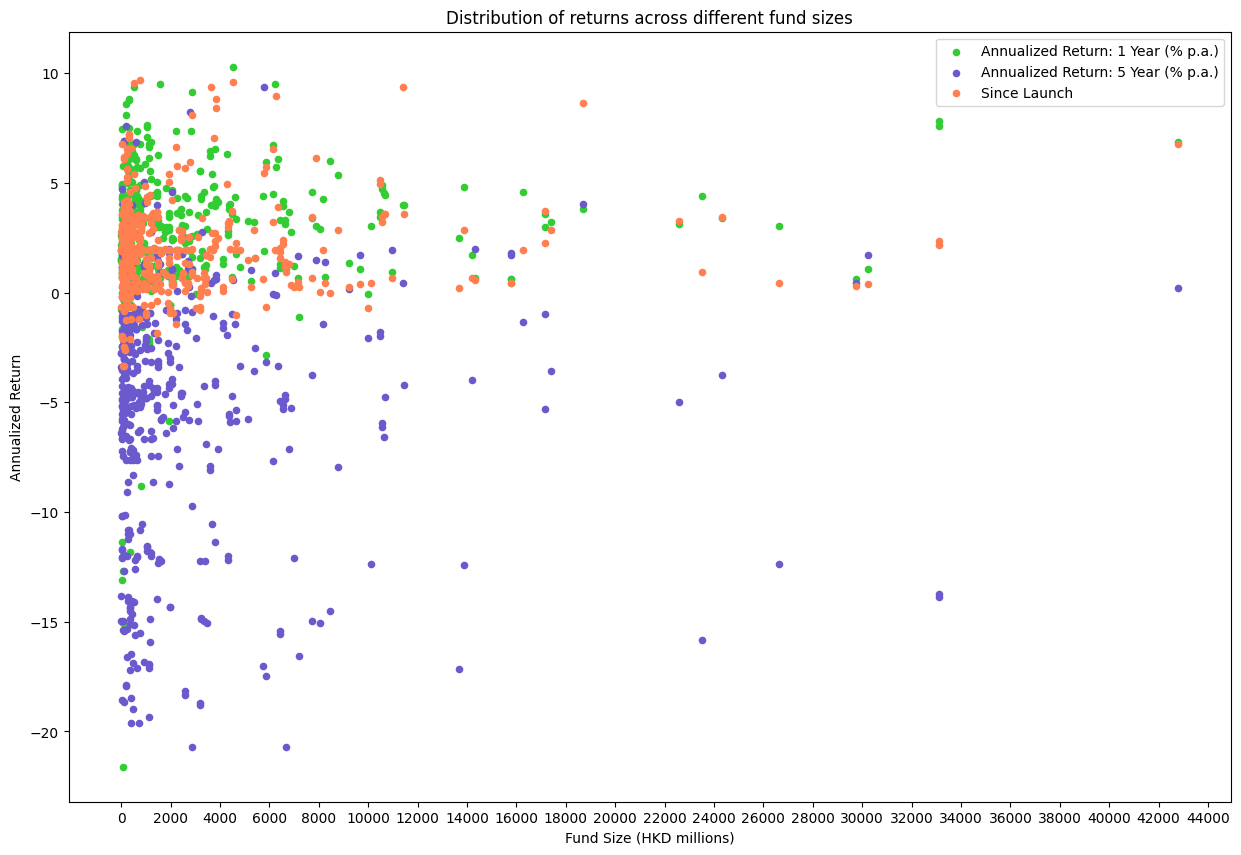

In [34]:
plotYear1 = df.plot(
    kind='scatter', 
    x='Fund Size (HKD m)', 
    y='Annualized Return: 1 Year (% p.a.)', 
    color='limegreen', 
    xticks=np.arange(0, 80000, 2000),
    figsize=(15, 10)
)
plotYear5 = df.plot(
    kind='scatter', 
    x='Fund Size (HKD m)', 
    y='Annualized Return: 5 Year (% p.a.)', 
    color='slateblue', 
    ax=plotYear1
)
plotSinceLaunch = df.plot(
    kind='scatter', 
    x='Fund Size (HKD m)', 
    y='Since Launch', 
    color='coral', 
    ax=plotYear1
)

plotYear1.set_xlabel('Fund Size (HKD millions)')
plotYear1.set_ylabel('Annualized Return')
plotYear1.set_title('Distribution of returns across different fund sizes')
plt.legend(['Annualized Return: 1 Year (% p.a.)', 'Annualized Return: 5 Year (% p.a.)', 'Since Launch'])

Text(0, 0.5, 'Return')

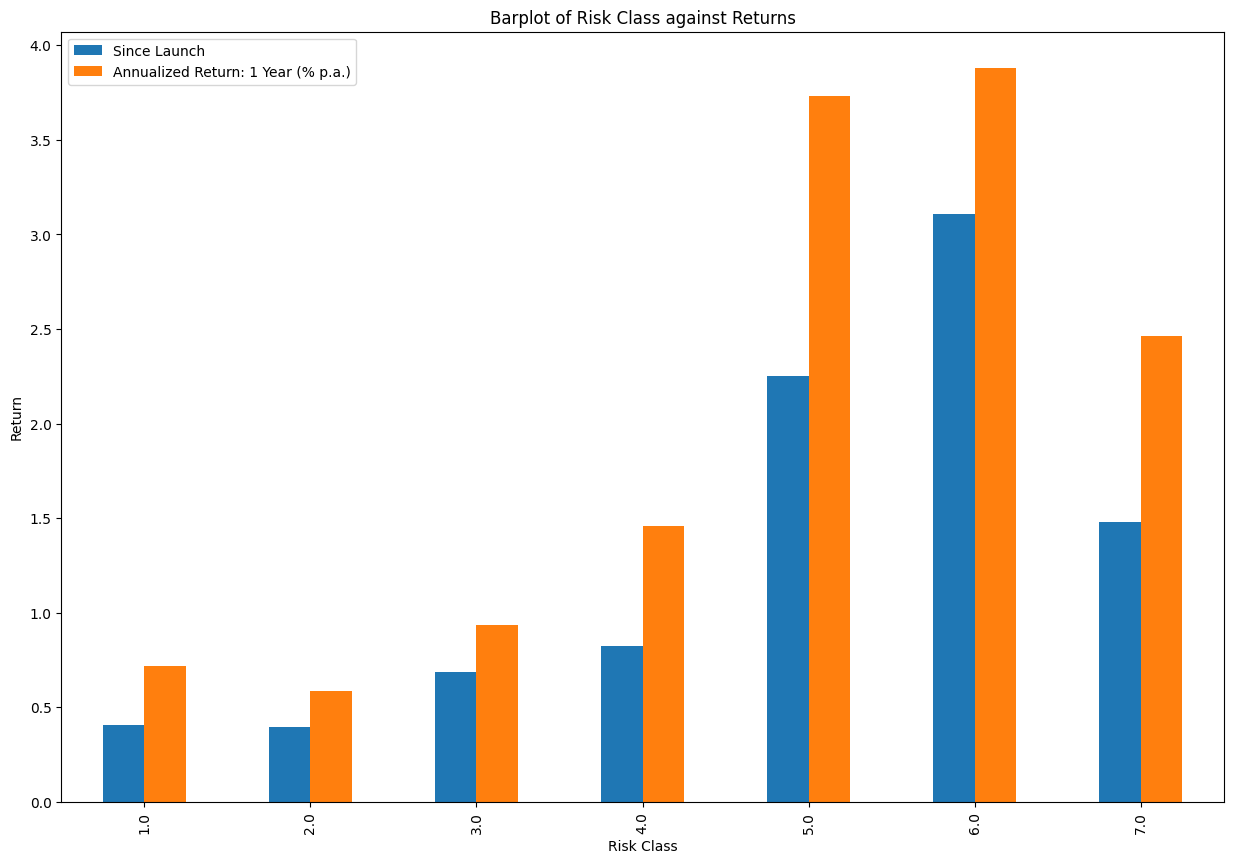

In [78]:
plotdata = df.loc[:, ["Since Launch", "Annualized Return: 1 Year (% p.a.)", 'Risk Class']].groupby('Risk Class').mean()
plotdata.plot(kind="bar", figsize=(15, 10))
plt.title("Barplot of Risk Class against Returns")
plt.xlabel("Risk Class")
plt.ylabel("Return")

Text(0, 0.5, 'Return')

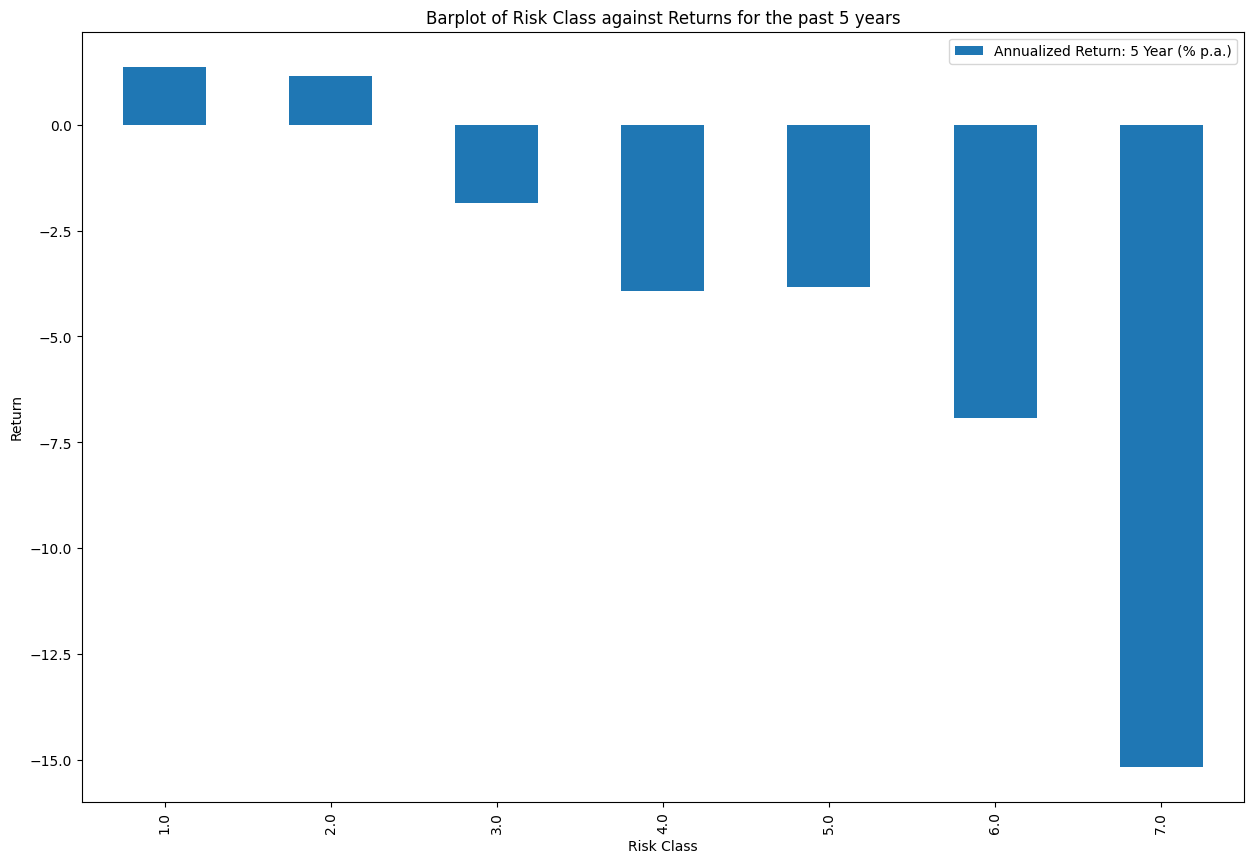

In [79]:
plotdata = df.loc[:, ["Annualized Return: 5 Year (% p.a.)", 'Risk Class']].groupby('Risk Class').mean()
plotdata.plot(kind="bar", figsize=(15, 10))
plt.title("Barplot of Risk Class against Returns for the past 5 years")
plt.xlabel("Risk Class")
plt.ylabel("Return")

In [221]:
df2 = df.loc[:, ["Since Launch", 'Risk Class', "Name"]]
risk_classes = np.sort(df['Risk Class'].unique())
classed_df = pd.concat([
    df2[df2['Risk Class'] == risk_class].nlargest(5, "Since Launch")
    for risk_class in risk_classes
])

In [188]:
classed_df

,Since Launch,Risk Class,Name
50,0.770000,1.0,BCOM MPF Conservative Fund
132,0.730000,1.0,BEA MPF Conservative Fund
99,0.680000,1.0,BEA (Industry Scheme) MPF Conservative Fund
147,0.650000,1.0,BOC-Prudential MPF Conservative Fund
256,0.640000,1.0,MPF Conservative Fund - Unit Class H
370,0.450000,2.0,Principal Cash Fund
395,0.390000,2.0,Principal HK Dollar Savings Fund - Class D
396,0.350000,2.0,Principal HK Dollar Savings Fund - Class I
180,1.934604,3.0,RMB Bond Fund
286,1.934604,3.0,Manulife MPF RMB Bond Fund


<Axes: xlabel='Risk Class'>

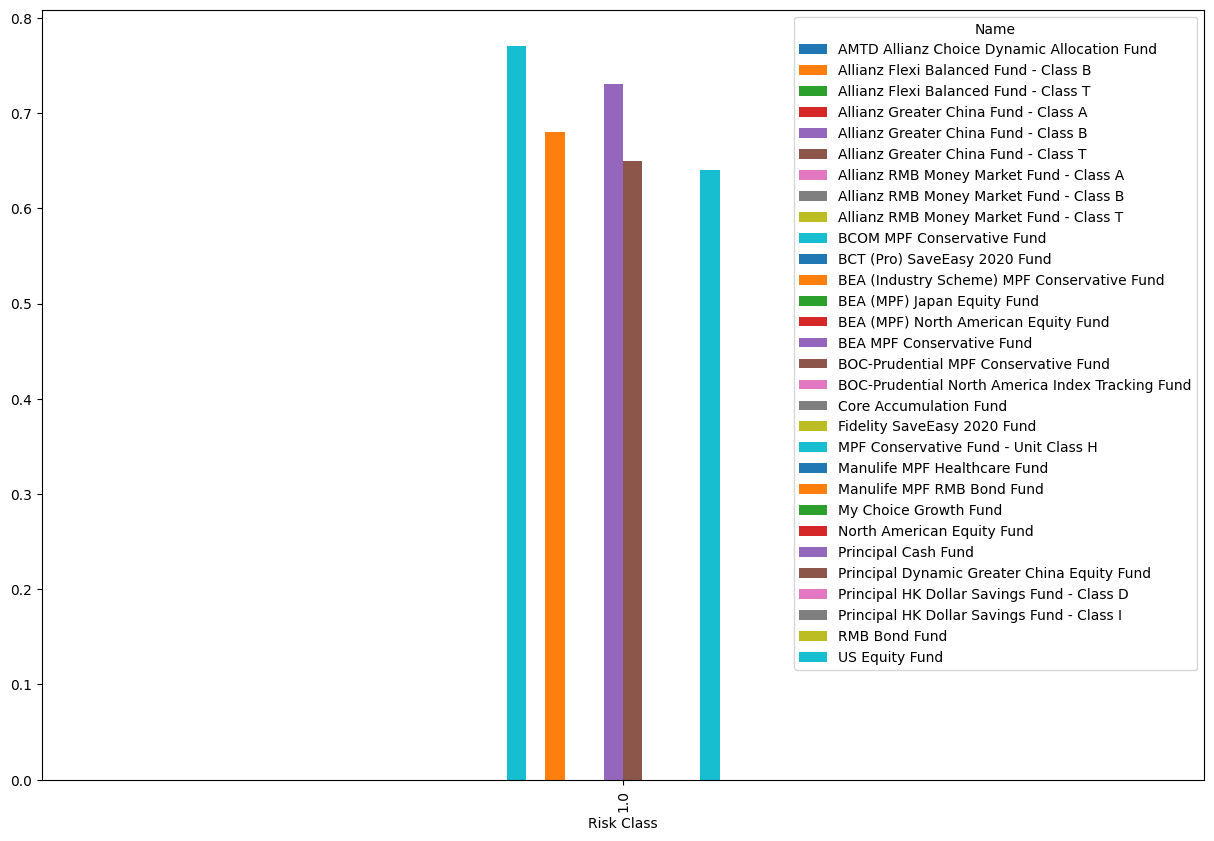

In [250]:
df_pivot = pd.pivot_table(
    classed_df,
    index = "Risk Class",
    columns = "Name",
    values = "Since Launch",
    fill_value = 0
)
df_pivot

temp_df = df_pivot[df_pivot.index == 1.0]
temp_df[temp_df != 0].plot(kind="bar", figsize=(15, 10))

Text(0, 0.5, 'Return')

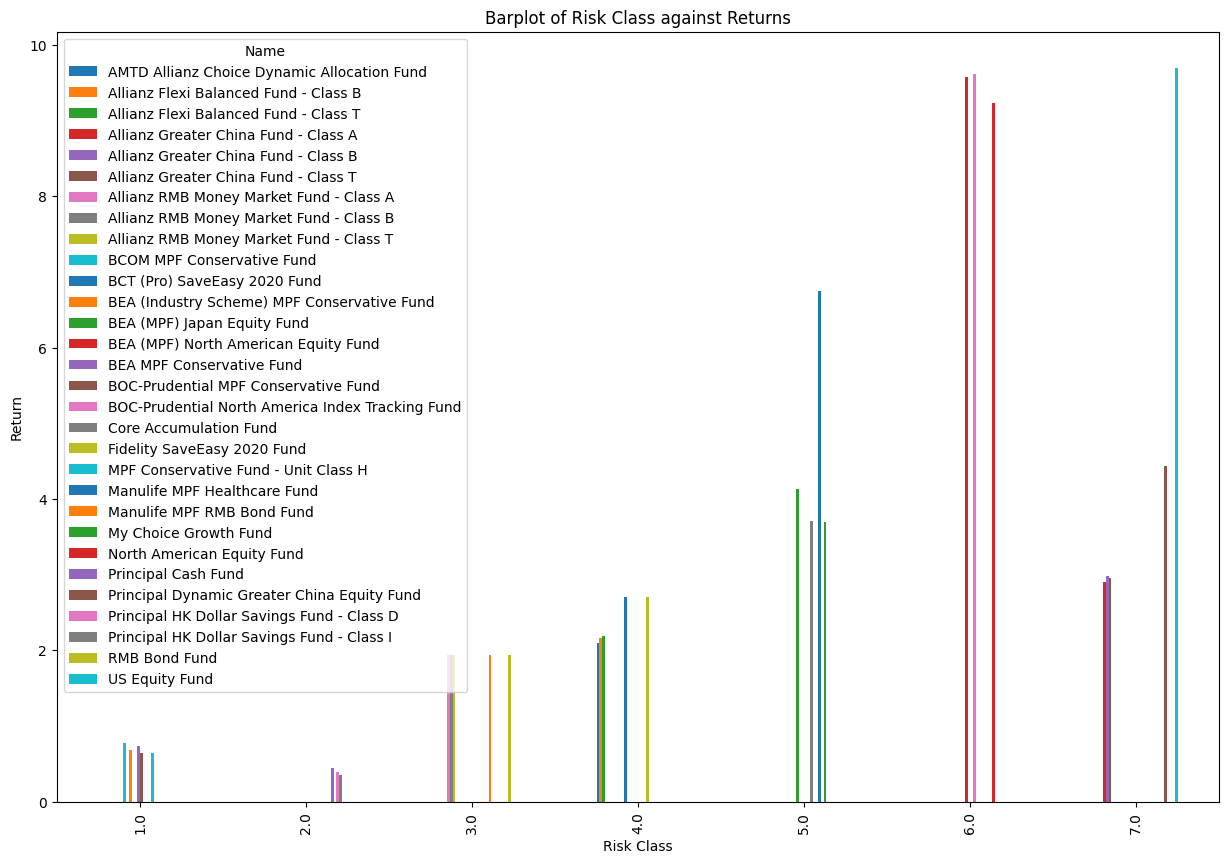

In [243]:
df_pivot.plot(kind="bar", figsize=(15, 10))
plt.title("Barplot of Risk Class against Returns")
plt.xlabel("Risk Class")
plt.ylabel("Return")

In [147]:
classed_df.loc[:, ["Name"]]

,Name
Risk Class,
1.0,BCOM MPF Conservative Fund
1.0,BEA MPF Conservative Fund
1.0,BEA (Industry Scheme) MPF Conservative Fund
1.0,BOC-Prudential MPF Conservative Fund
1.0,MPF Conservative Fund - Unit Class H
2.0,Principal Cash Fund
2.0,Principal HK Dollar Savings Fund - Class D
2.0,Principal HK Dollar Savings Fund - Class I
3.0,RMB Bond Fund
